### This example evaluates the accuracy when modelling wastewater treatment processes in a reactor. An evaluation is made for two models, a mechanistic model, and a data-driven model.

In [1]:
import pandas as pd
import modelskill as ms

#### The csv file has 10 columns:
- Datetime
- Measured_NH4	
- Mechanistic_NH4	
- Datadriven_NH4	
- Measured_NO3	
- Mechanistic_NO3	
- Datadriven_NO3
- Measured_DO	
- Mechanistic_DO	
- Datadriven_DO	

In [2]:
df = pd.read_csv('../tests/testdata/wwt_models.csv', index_col='Datetime', parse_dates=True)
df.head()

,Measured_NH4,Mechanistic_NH4,Datadriven_NH4,Measured_NO3,Mechanistic_NO3,Datadriven_NO3,Measured_DO,Mechanistic_DO,Datadriven_DO
Datetime,,,,,,,,,
2023-09-20 01:00:00,11.68880,8.99840,18.20485,3.49410,1.11815,1.57890,0.47120,0.68590,0.39520
2023-09-20 02:00:00,10.54595,7.86220,14.62335,4.62840,1.55515,2.45385,0.31920,0.72105,0.34580
2023-09-20 03:00:00,10.53645,6.75545,12.36995,4.48115,2.11090,2.99345,0.12065,0.73150,0.25935
2023-09-20 04:00:00,10.98010,5.77220,9.33280,3.60620,2.49375,3.10460,0.12635,0.54910,0.12255
2023-09-20 05:00:00,11.02000,5.38935,8.88440,3.05995,2.03775,3.45040,0.15865,0.33250,0.11305


### Evaluate the NH4 model accuracy

In [3]:
df_nh4 = df[['Measured_NH4', 'Mechanistic_NH4','Datadriven_NH4']]

In [4]:
cmp = ms.from_matched(df_nh4, obs_item='Measured_NH4', quantity=ms.Quantity(name="NH4",unit="mgNH4/l"))
cmp

<Comparer>
Quantity: NH4 [mgNH4/l]
Observation: Measured_NH4, n_points=1807
 Model: Mechanistic_NH4, rmse=3.810
 Model: Datadriven_NH4, rmse=2.711

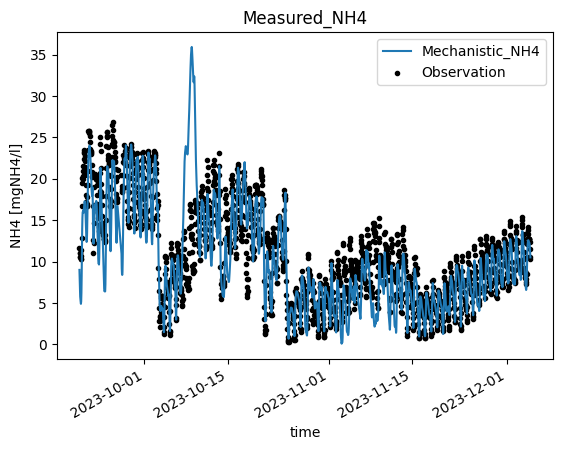

In [5]:
cmp.sel(model='Mechanistic_NH4').plot.timeseries();

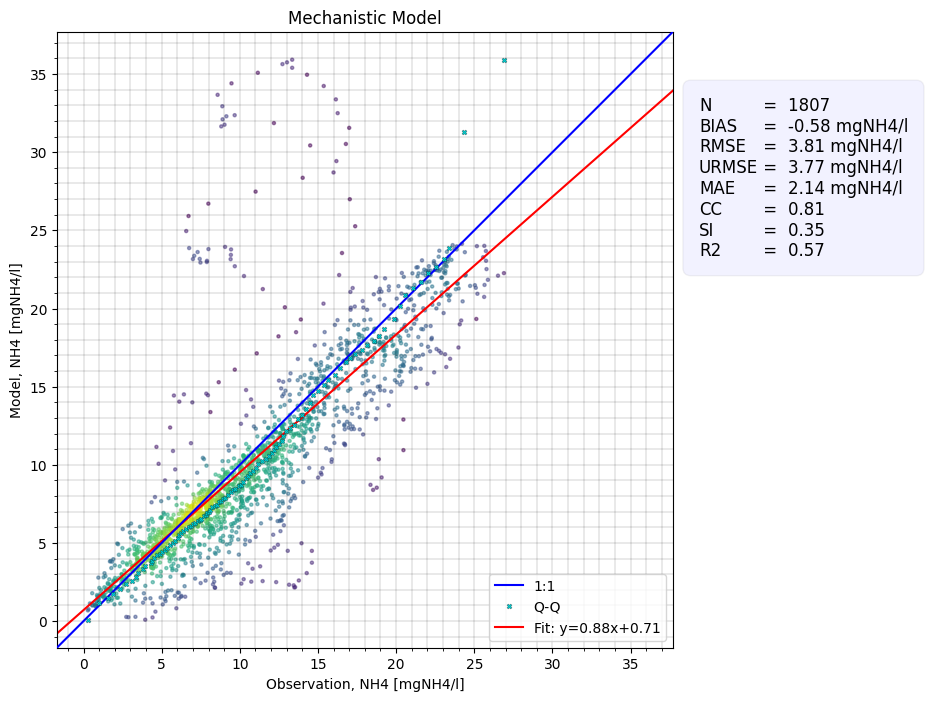

In [6]:
cmp.sel(model='Mechanistic_NH4').plot.scatter(skill_table=True, title='Mechanistic Model');

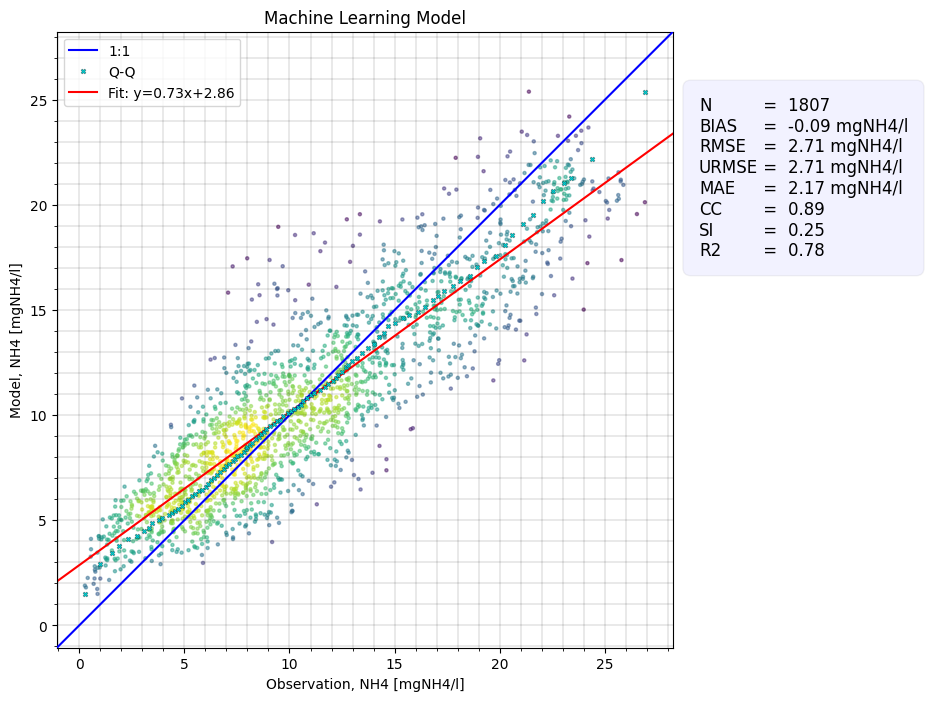

In [7]:
cmp.sel(model='Datadriven_NH4').plot.scatter(skill_table=True, title='Machine Learning Model');

[<Axes: title={'center': 'r2'}, xlabel='time'>]

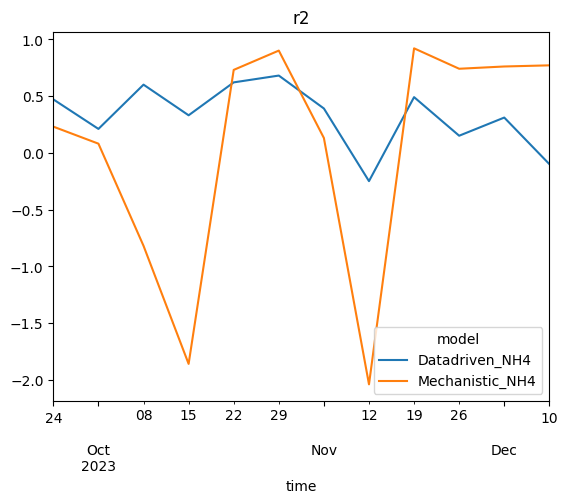

In [8]:
cmp.skill(by=['model','freq:W']).round(2).plot.line('r2')


In [9]:
cmp.score('r2')

array([0.7841614 , 0.57365522])

In [10]:
cmp.plot.timeseries(backend="plotly")

### Evaluate the NO3 model accuracy

In [11]:
df_no3 = df[['Measured_NO3', 'Mechanistic_NO3','Datadriven_NO3']]

In [12]:
cmp = ms.from_matched(df_no3, obs_item='Measured_NO3', quantity=ms.Quantity(name="NO3",unit="mgNO3/l"))
cmp

<Comparer>
Quantity: NO3 [mgNO3/l]
Observation: Measured_NO3, n_points=1807
 Model: Mechanistic_NO3, rmse=2.475
 Model: Datadriven_NO3, rmse=1.280

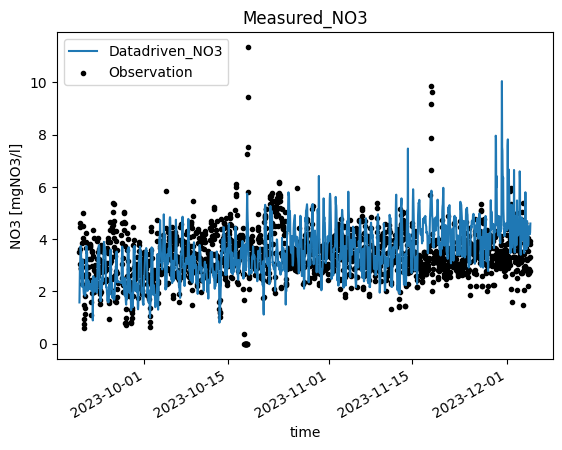

In [13]:
cmp.sel(model='Datadriven_NO3').plot.timeseries();

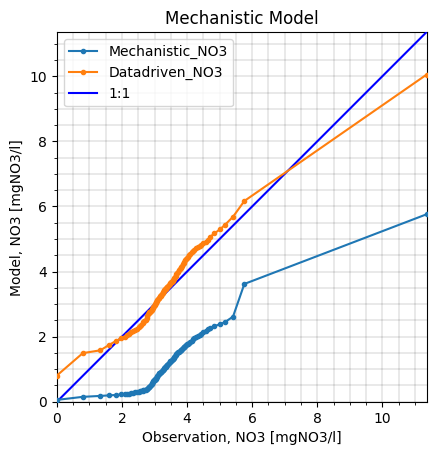

In [14]:
cmp.plot.qq(title='Mechanistic Model');

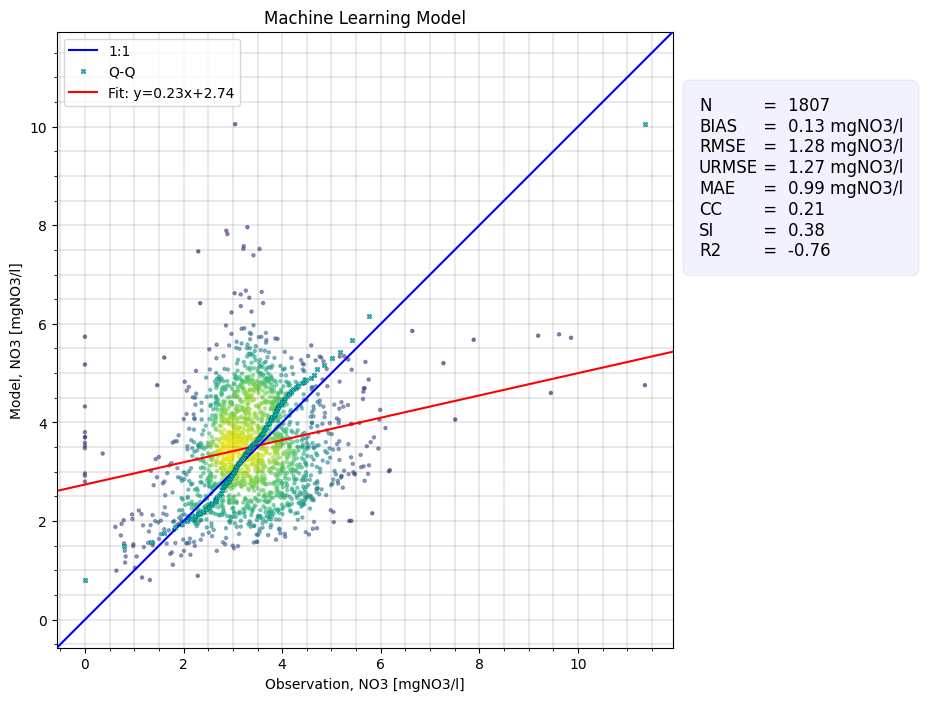

In [15]:
cmp.sel(model='Datadriven_NO3').plot.scatter(skill_table=True, title='Machine Learning Model');

In [16]:
cmp.skill().round(2)

,observation,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,,
Datadriven_NO3,Measured_NO3,1807,0.13,1.28,1.27,0.99,0.21,0.38,-0.76
Mechanistic_NO3,Measured_NO3,1807,-2.22,2.47,1.09,2.27,0.24,0.32,-5.57


In [17]:
cmp.plot.timeseries(backend="plotly")

### Evaluate the DO model accuracy

In [18]:
df_do = df[['Measured_DO', 'Mechanistic_DO','Datadriven_DO']]

In [19]:
cmp = ms.from_matched(df_do, obs_item='Measured_DO', quantity=ms.Quantity(name="DO",unit="mgDO/l"))
cmp

<Comparer>
Quantity: DO [mgDO/l]
Observation: Measured_DO, n_points=1807
 Model: Mechanistic_DO, rmse=0.373
 Model: Datadriven_DO, rmse=0.310

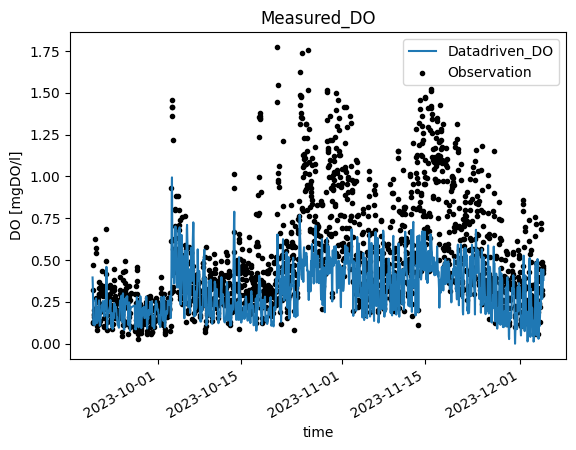

In [20]:
cmp.sel(model='Datadriven_DO').plot.timeseries();

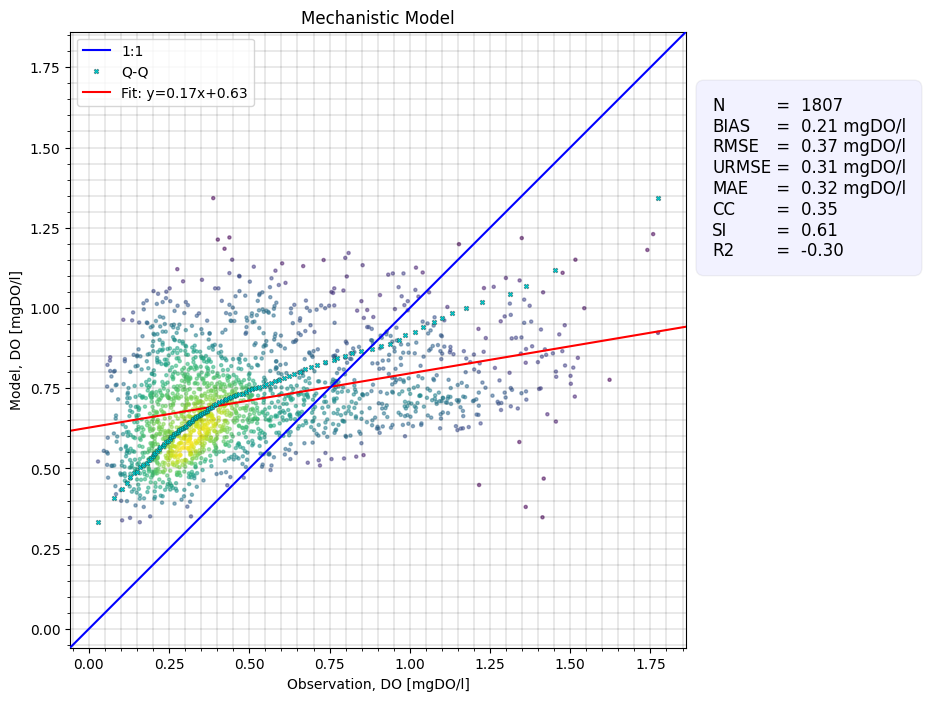

In [21]:
cmp.sel(model='Mechanistic_DO').plot.scatter(skill_table=True, title='Mechanistic Model');

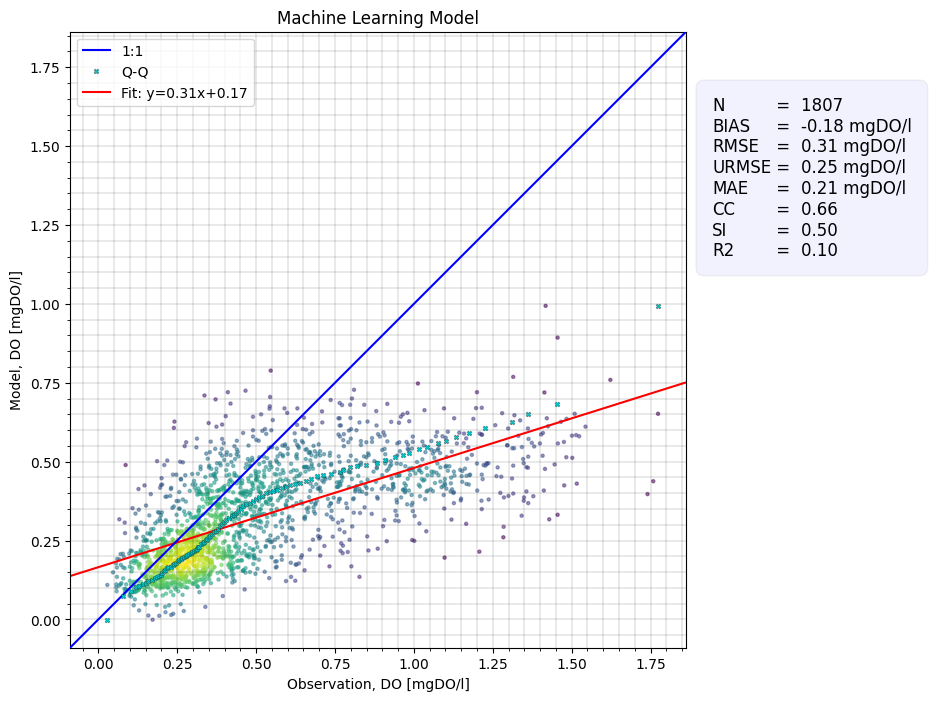

In [22]:
cmp.sel(model='Datadriven_DO').plot.scatter(skill_table=True, title='Machine Learning Model');

In [23]:
cmp.skill().round(2)

,observation,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,,
Datadriven_DO,Measured_DO,1807,-0.18,0.31,0.25,0.21,0.66,0.50,0.1
Mechanistic_DO,Measured_DO,1807,0.21,0.37,0.31,0.32,0.35,0.61,-0.3


In [24]:
cmp.plot.timeseries(backend="plotly")